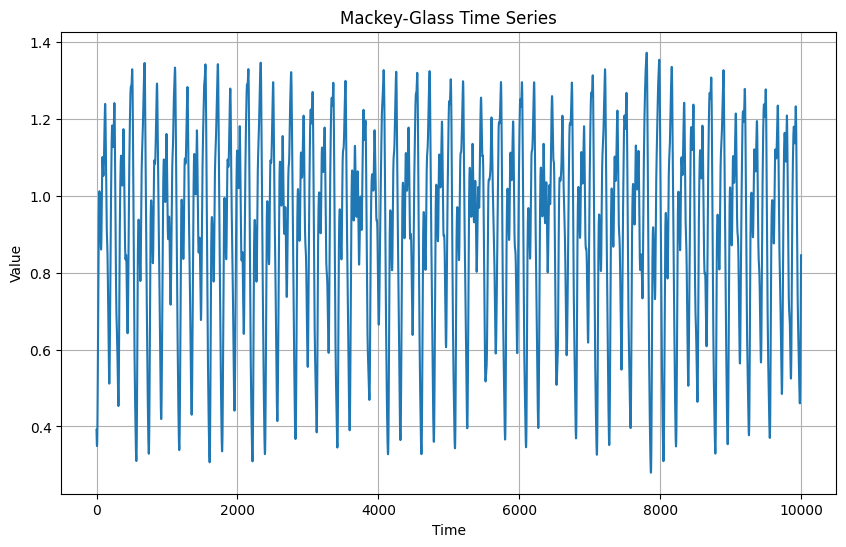

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def mackey_glass(length=10000, x0=None, a=0.2, b=0.1, c=10.0, tau=23.0,
                 n=1000, sample=0.46, discard=250):
    """Generate time series using the Mackey-Glass equation.

    Generates time series using the discrete approximation of the
    Mackey-Glass delay differential equation described by Grassberger &
    Procaccia (1983).

    Parameters
    ----------
    length : int, optional (default = 10000)
        Length of the time series to be generated.
    x0 : array, optional (default = random)
        Initial condition for the discrete map.  Should be of length n.
    a : float, optional (default = 0.2)
        Constant a in the Mackey-Glass equation.
    b : float, optional (default = 0.1)
        Constant b in the Mackey-Glass equation.
    c : float, optional (default = 10.0)
        Constant c in the Mackey-Glass equation.
    tau : float, optional (default = 23.0)
        Time delay in the Mackey-Glass equation.
    n : int, optional (default = 1000)
        The number of discrete steps into which the interval between
        t and t + tau should be divided.  This results in a time
        step of tau/n and an n + 1 dimensional map.
    sample : float, optional (default = 0.46)
        Sampling step of the time series.  It is useful to pick
        something between tau/100 and tau/10, with tau/sample being
        a factor of n.  This will make sure that there are only whole
        number indices.
    discard : int, optional (default = 250)
        Number of n-steps to discard in order to eliminate transients.
        A total of n*discard steps will be discarded.

    Returns
    -------
    x : array
        Array containing the time series.
    """
    sample = int(n * sample / tau)
    grids = n * discard + sample * length
    x = np.empty(grids)

    if not x0:
        x[:n] = 0.5 + 0.05 * (-1 + 2 * np.random.random(n))
    else:
        x[:n] = x0

    A = (2 * n - b * tau) / (2 * n + b * tau)
    B = a * tau / (2 * n + b * tau)

    for i in range(n - 1, grids - 1):
        x[i + 1] = A * x[i] + B * (x[i - n] / (1 + x[i - n] ** c) +
                                   x[i - n + 1] / (1 + x[i - n + 1] ** c))
    return x[n * discard::sample]

x = mackey_glass()

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(x)
plt.title("Mackey-Glass Time Series")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()
